In [1]:
# import necessary libraries 
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import random
from sklearn.preprocessing import StandardScaler

### Load the Dependent/Independent Variables

In [2]:
X = load_boston().data
y = load_boston().target
summary=[]

In [3]:
X.shape

(506, 13)

### Split the Data into train and Test

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### Coloumn Normalize the Data

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


### Implment SGD - Manually 

In [6]:
def manual_SGD(X,y,learning_rate,iterations):
    N = random.randint(1,len(X))
    w0 = np.zeros(shape=(1,13))
    b0 = np.random.rand() 
    t=1
    
    while (t<=iterations):
        m_deriv = 0
        b_deriv = 0
        for i in range(N):
            #mx+b
            eq=np.dot(w0 , X[i]) + b0
            
            # x * (y-(mx +b))
            m_deriv +=X[i] * (y[i] - eq)
            
            # (y - (mx + b))
            b_deriv += (y[i] - eq)
            
        # -2/N sum(x * (y-(mx +b)))
        m_deriv = m_deriv*(-2/N)
        
        # -2/N sum(y - (mx + b))
        b_deriv = b_deriv*(-2/N)
        
        w1 = w0 - (m_deriv*learning_rate)
        b1 = b0 - (b_deriv*learning_rate)
        
        w0 = w1
        b0 = b1
        
        #learning_rate = learning_rate/2
        
        t+=1

    return w1,b1

### Predictor function

In [7]:
def pred(x,w,b):
    y_pred=[]
    
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

### plotter function

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Actual_Predicted(test_data,y_pred):
    #scatter plot
    plt.scatter(test_data,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    print('**************************************************************')
    
    
       
    manual_error=mean_squared_error(test_data,y_pred)
    print('error=',manual_error)
    
    delta_y=test_data-y_pred
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(delta_y), bw=0.5)
    plt.show()

    
    return manual_error

### Manual VS SKLearn Function

In [9]:
def plot_manual_skl(manual,skl):
    plt.scatter(manual,skl)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between manual y and sklearn y')
    plt.xlabel('Manual predicted y')
    plt.ylabel('sklearn predicted y')
    plt.show()

### Learning_rate=0.01, iterations=100 - Manual

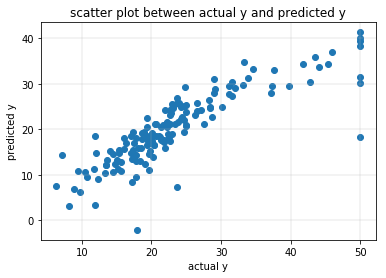

**************************************************************
error= 33.81297138708705


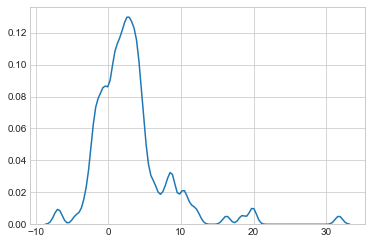

In [10]:
w,b=manual_SGD(X=X_train,y=y_train,learning_rate=0.01,iterations=100)
y_pred_man=pred(X_test, w=w, b=b)
error = plot_Actual_Predicted(y_test,y_pred_man)
summary.append(['Manual','0.01','100',str(error)])

### Learning_rate=0.01, iterations=100 - SKLearn

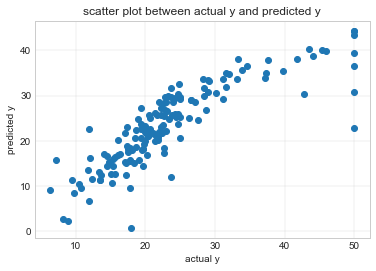

**************************************************************
error= 25.939945990992914


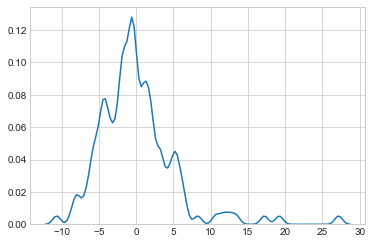

In [11]:
sgd = SGDRegressor(penalty='none', max_iter=100, learning_rate='constant' , eta0=0.01  )
sgd.fit(X_train, y_train)
y_pred_skl=sgd.predict(X_test)
error=plot_Actual_Predicted(y_test,y_pred_skl)
summary.append(['SKLearn','0.01','100',str(error)])

### Manual VS SKLearn 

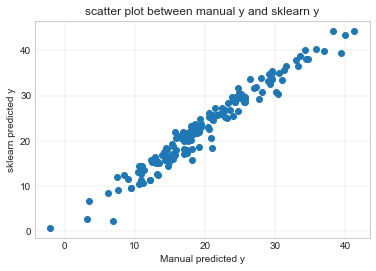

In [12]:
plot_manual_skl(y_pred_man,y_pred_skl)

### Learning_rate=0.01, iterations=1000 - Manual

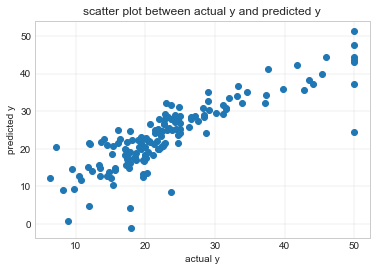

**************************************************************
error= 26.21426027428753


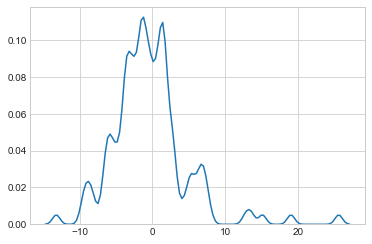

In [13]:
w,b=manual_SGD(X=X_train,y=y_train,learning_rate=0.01,iterations=1000)
y_pred_man=pred(X_test, w=w, b=b)
error=plot_Actual_Predicted(y_test,y_pred_man)
summary.append(['Manual','0.01','1000',str(error)])

### Learning_rate=0.01, iterations=1000 - SKLearn

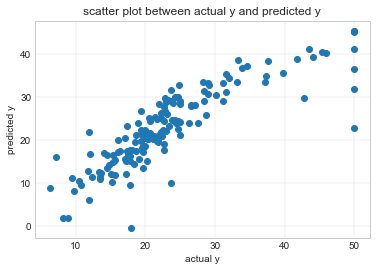

**************************************************************
error= 25.250247583153325


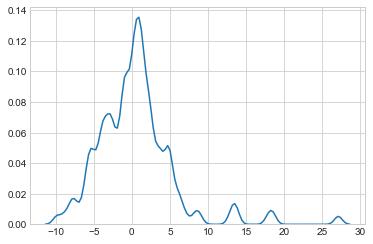

In [14]:
sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.01  )
sgd.fit(X_train, y_train)
y_pred_skl=sgd.predict(X_test)
error=plot_Actual_Predicted(y_test,y_pred_skl)
summary.append(['SKLean','0.01','1000',str(error)])

### manual VS SKLearn

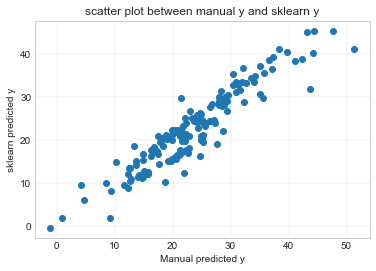

In [15]:
plot_manual_skl(y_pred_man,y_pred_skl)

### Learning_rate=0.01, iterations=2000 - Manual

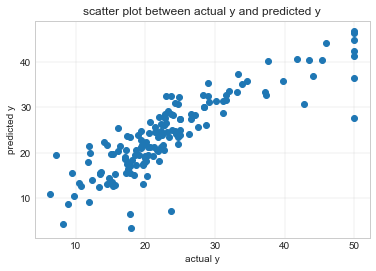

**************************************************************
error= 24.285297548911803


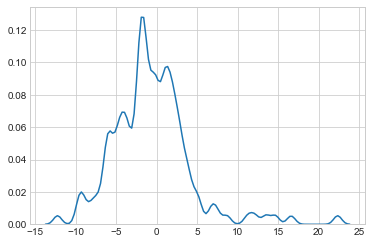

In [16]:
w,b=manual_SGD(X=X_train,y=y_train,learning_rate=0.01,iterations=2000)
y_pred_man=pred(X_test, w=w, b=b)
error=plot_Actual_Predicted(y_test,y_pred_man)
summary.append(['Manual','0.01','2000',str(error)])

### Learning_rate=0.01, iterations=2000 - SKLearn

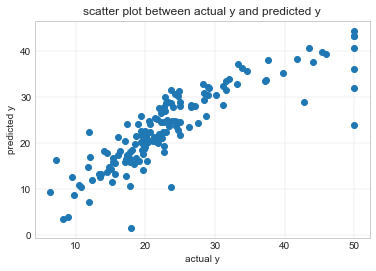

**************************************************************
error= 24.111453981178357


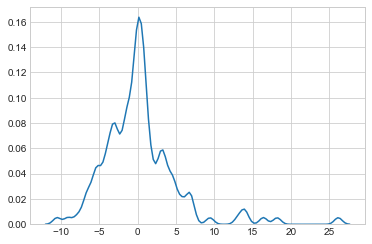

In [17]:
sgd = SGDRegressor(penalty='none', max_iter=2000, learning_rate='constant' , eta0=0.01  )
sgd.fit(X_train, y_train)
y_pred_skl=sgd.predict(X_test)
error=plot_Actual_Predicted(y_test,y_pred_skl)
summary.append(['SKLearn','0.01','2000',str(error)])

### manual VS SKLearn

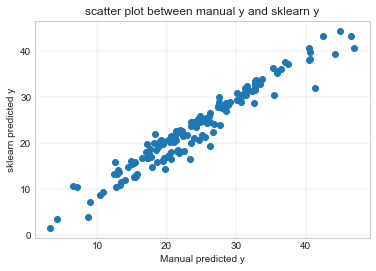

In [18]:
plot_manual_skl(y_pred_man,y_pred_skl)

### Conclusions 

In [19]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['SGD Model', "Learning Rate", "iterations","Error"]

for each in summary:
    x.add_row(each)

print(x)

+-----------+---------------+------------+--------------------+
| SGD Model | Learning Rate | iterations |       Error        |
+-----------+---------------+------------+--------------------+
|   Manual  |      0.01     |    100     | 33.81297138708705  |
|  SKLearn  |      0.01     |    100     | 25.939945990992914 |
|   Manual  |      0.01     |    1000    | 26.21426027428753  |
|   SKLean  |      0.01     |    1000    | 25.250247583153325 |
|   Manual  |      0.01     |    2000    | 24.285297548911803 |
|  SKLearn  |      0.01     |    2000    | 24.111453981178357 |
+-----------+---------------+------------+--------------------+
